In [8]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

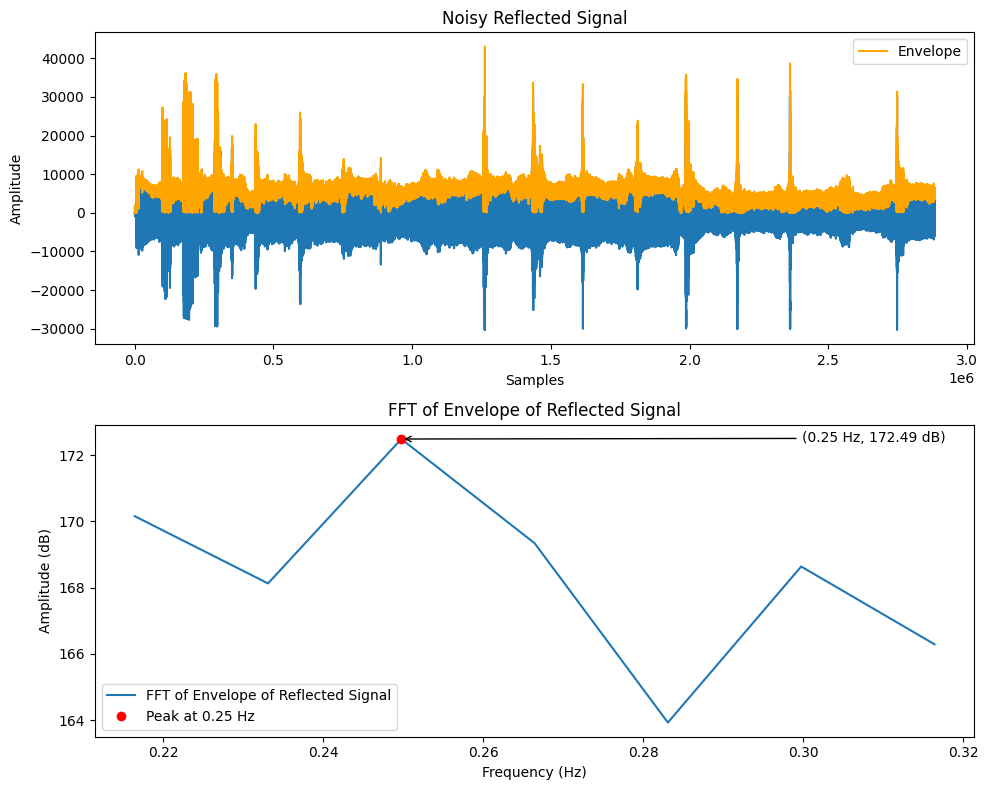

In [19]:
fig, ax = plt.subplots(2, figsize=(10, 8))
audio = AudioSegment.from_file("data/breathing2.caf", format="caf")
samples = np.array(audio.get_array_of_samples())
# samples, fs  = sf.read("data/breathing2.caf")
fs = audio.frame_rate

ax[0].plot(samples)
ax[0].set_title("Noisy Reflected Signal")
ax[0].set_xlabel("Samples")
ax[0].set_ylabel("Amplitude")

envelope = np.abs(hilbert(samples))
ax[0].plot(envelope, color="orange", label="Envelope")
ax[0].legend()

fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = 20 * np.log10(np.abs(fft_envelope))

freqs = np.fft.fftfreq(len(envelope), d=1/fs)

breathing_range = (freqs >= 0.2) & (freqs <= 0.33)
filtered_freqs = freqs[breathing_range]
filtered_magnitudes = fft_envelope_magnitude[breathing_range]

peak_index = np.argmax(filtered_magnitudes)
peak_freq = filtered_freqs[peak_index]
peak_magnitude = filtered_magnitudes[peak_index]

ax[1].plot(filtered_freqs, filtered_magnitudes, label="FFT of Envelope of Reflected Signal")
ax[1].plot(peak_freq, peak_magnitude, 'ro', label=f"Peak at {peak_freq:.2f} Hz")

ax[1].annotate(f"({peak_freq:.2f} Hz, {peak_magnitude:.2f} dB)",
               xy=(peak_freq, peak_magnitude), 
               xytext=(peak_freq + 0.05, peak_magnitude-0.1),
               ha='left',
               arrowprops=dict(facecolor='black', arrowstyle="->"),
               fontsize=10)

ax[1].set_title("FFT of Envelope of Reflected Signal")
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude (dB)")
ax[1].legend()

plt.tight_layout()
fig.savefig("breathing.png", dpi=300)

In [21]:
peak_idx = np.argmax(filtered_magnitudes)
estimated_breathing_frequency = filtered_freqs[peak_idx]
estimated_amplitude = filtered_magnitudes[peak_idx]

print(f"Estimated Breathing Frequency: {estimated_breathing_frequency:.2f} Hz")
print(f"Amplitude at Estimated Frequency: {estimated_amplitude:.2f} dB")

Estimated Breathing Frequency: 0.25 Hz
Amplitude at Estimated Frequency: 82.18 dB


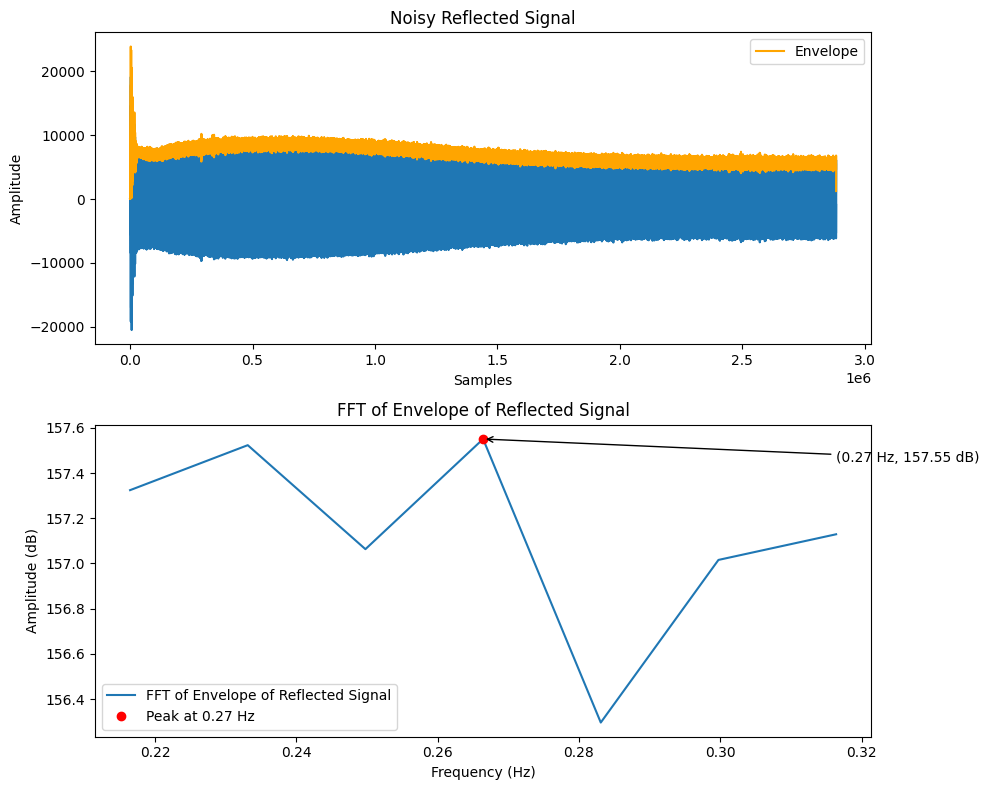

In [20]:
fig, ax = plt.subplots(2, figsize=(10, 8))

audio = AudioSegment.from_file("data/wall.caf", format="caf")
samples = np.array(audio.get_array_of_samples())
fs = audio.frame_rate

ax[0].plot(samples)
ax[0].set_title("Noisy Reflected Signal")
ax[0].set_xlabel("Samples")
ax[0].set_ylabel("Amplitude")

envelope = np.abs(hilbert(samples))
ax[0].plot(envelope, color="orange", label="Envelope")
ax[0].legend()

fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = 20 * np.log10(np.abs(fft_envelope))

freqs = np.fft.fftfreq(len(envelope), d=1/fs)

breathing_range = (freqs >= 0.2) & (freqs <= 0.33)
filtered_freqs = freqs[breathing_range]
filtered_magnitudes = fft_envelope_magnitude[breathing_range]

peak_index = np.argmax(filtered_magnitudes)
peak_freq = filtered_freqs[peak_index]
peak_magnitude = filtered_magnitudes[peak_index]

ax[1].plot(filtered_freqs, filtered_magnitudes, label="FFT of Envelope of Reflected Signal")
ax[1].plot(peak_freq, peak_magnitude, 'ro', label=f"Peak at {peak_freq:.2f} Hz")

ax[1].annotate(f"({peak_freq:.2f} Hz, {peak_magnitude:.2f} dB)",
               xy=(peak_freq, peak_magnitude), 
               xytext=(peak_freq + 0.05, peak_magnitude-0.1),
               ha='left',
               arrowprops=dict(facecolor='black', arrowstyle="->"),
               fontsize=10)

ax[1].set_title("FFT of Envelope of Reflected Signal")
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude (dB)")
ax[1].legend()

plt.tight_layout()
fig.savefig("wall.png", dpi=300)

In [23]:
breathing_range

array([False, False, False, ..., False, False, False])

In [24]:
peak_idx = np.argmax(filtered_magnitudes)
estimated_breathing_frequency = filtered_freqs[peak_idx]
estimated_amplitude = filtered_magnitudes[peak_idx]

print(f"Estimated Breathing Frequency: {estimated_breathing_frequency:.2f} Hz")
print(f"Amplitude at Estimated Frequency: {estimated_amplitude:.2f} dB")

Estimated Breathing Frequency: 0.23 Hz
Amplitude at Estimated Frequency: 83.05 dB
